# Joint plot

In [1]:
import numpy as np
import pandas as pd

from lets_plot.bistro import *
from lets_plot import *


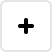
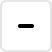
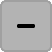
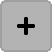
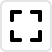
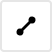
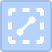
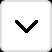
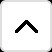
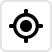

In [2]:
LetsPlot.setup_html()

In [3]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv")
print(df.shape)
df.head()

(150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Default plot

In [5]:
data = {
    'x': [0, 1],
    'y': [0, 1],
}
joint_plot(data, 'x', 'y')

In [6]:
joint_plot(df, "petal_length", "petal_width")

## Change geom type

In [7]:
data = {
    'x': [0, 1, 1],
    'y': [0, 1, 1],
}
joint_plot(data, 'x', 'y', geom='tile')

In [8]:
joint_plot(df, "petal_length", "petal_width", geom='tile')

In [9]:
data = {
    'x': [0, 1, 1],
    'y': [0, 1, 1],
}
joint_plot(data, 'x', 'y', geom='density2d')

In [10]:
joint_plot(df.dropna(), "petal_length", "petal_width", color_by="species", geom='density2d')

In [11]:
data = {
    'x': [0, 1, 1],
    'y': [0, 1, 1],
}
joint_plot(data, 'x', 'y', geom='density2df')

In [12]:
joint_plot(df.dropna(), "petal_length", "petal_width", color_by="species", geom='density2df')

## Geometries customization

In [13]:
joint_plot(df, "petal_length", "petal_width", color="#756bb1", size=8, alpha=.5, se=False)

In [14]:
joint_plot(df, "petal_length", "petal_width", geom='none', color="black", reg_line=False) + \
    geom_density2df(color="white", fill="#feb24c", size=.5, alpha=1/3) + \
    geom_point(size=5, shape=21, color="black", fill="#feb24c")

## Marginal layers customization

In [15]:
joint_plot(df, "petal_length", "petal_width", color="black", marginal="box:lb:.03,hist:t:.4,hist:r") + \
    ggmarginal("tr", layer=geom_area(stat='density', color="magenta", fill="magenta", alpha=.1)) + \
    theme(axis_line_x='blank', axis_line_y='blank')

## Grouping

In [16]:
joint_plot(df, "petal_length", "petal_width", color_by="species", marginal="hist:tr")

In [17]:
joint_plot(df, "petal_length", "petal_width", color_by="species") + facet_grid(x="species")

## Interaction with other graph elements

In [18]:
joint_plot(df, "petal_length", "petal_width", geom='tile', bins=[20, 10], color="#bd0026") + \
    coord_fixed(ratio=1.25) + \
    scale_fill_gradient(low="#f03b20", high="#ffeda0") + \
    theme(axis_line=element_line(color="#bd0026"), \
          axis_ticks=element_line(color="#bd0026"), \
          axis_text=element_text(color="#bd0026"), \
          axis_title=element_text(color="#bd0026"), \
          legend_text=element_text(color="#bd0026"), \
          legend_title=element_text(color="#bd0026")) + \
    flavor_solarized_light()

## Regression tests

In [19]:
tests = [
    {
        'data': {
            'x': [],
            'y': [],
        },
        'title': "Empty dataset",
    },
    {
        'data': {
            'x': [0],
            'y': [0],
        },
        'title': "Small dataset",
    },
    {
        'data': {
            'x': [0, np.nan, 2],
            'y': [0, 1, np.nan],
        },
        'title': "NaN's in data",
    },
    {
        'data': {
            'x': [0, 1, np.nan],
            'y': [0, 1, np.nan],
            'g': ['a', 'a', 'b'],
        },
        'color_by': 'g',
        'title': "One of groups is empty",
    },
]

test = lambda i: (lambda p: tests[i][p] if p in tests[i] else None)

plot_matrix([
    joint_plot(test(i)('data'), 'x', 'y', color_by=test(i)('color_by'), reg_line=False) + \
        ggtitle(test(i)('title'))
    for i in range(len(tests))
])